<>:61: SyntaxWarning: invalid escape sequence '\d'
<>:61: SyntaxWarning: invalid escape sequence '\d'
C:\Users\AmirHosein\AppData\Local\Temp\ipykernel_13376\2381539985.py:61: SyntaxWarning: invalid escape sequence '\d'
  plt.title('CFD Solution of $\dfrac{d^2\phi}{dx^2} + s(x) = 0$')


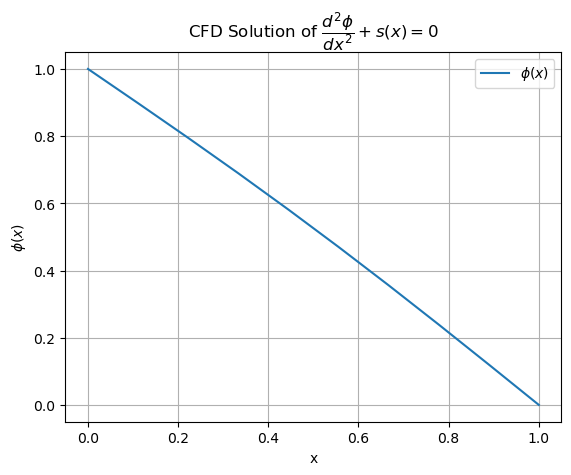

In [4]:
#pip install numpy
#pip install matplotlib

import numpy as np 
import matplotlib.pyplot as plt


# Domain setup and discretization
x_start = 0
x_end = 1
N = 10  # Number of grid points
dx = (x_end - x_start) / (N - 1)  # Grid spacing
x = np.linspace(x_start, x_end, N)



# Boundary conditions
phi_L = 1  # φ(0)
phi_R = 0  # φ(1)


# Define the source term s(x)
def s(x):
    return x*(1-x) 


# Initialize the solution array
phi = np.zeros(N)


# Apply boundary conditions
phi[0] = phi_L
phi[-1] = phi_R


# Construct the system of equations (Finite Difference Method)
A = np.zeros((N, N))  # Coefficient matrix
b = np.zeros(N)       # Right-hand side (source term)


# Fill the matrix and right-hand side
for i in range(1, N-1):
    A[i, i-1] = 1 
    A[i, i] = -2 
    A[i, i+1] = 1 
    b[i] = -s(x[i])*dx**2

# Apply boundary conditions to the system
A[0, 0] = 1
A[-1, -1] = 1
b[0] = phi_L
b[-1] = phi_R

# Solve the system of linear equations A * phi = b
phi = np.linalg.solve(A, b)

# Plot the result
plt.plot(x, phi, label=r'$\phi(x)$')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('CFD Solution of $\dfrac{d^2\phi}{dx^2} + s(x) = 0$')
plt.legend()
plt.grid(True)
plt.show()